In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('musk_csv.csv')
dataset.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [3]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

/Users/skhiearth/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# Importing Keras and TensorFlow
import tensorflow as tf

# Initialising the ANN
classifier = tf.keras.models.Sequential([
    tf.keras.layers.Dense(80, activation= tf.nn.relu, input_shape = [166]),
    tf.keras.layers.Dense(50, activation= tf.nn.relu),
    tf.keras.layers.Dense(20, activation= tf.nn.relu),
    tf.keras.layers.Dense(1, activation= tf.nn.sigmoid)
])

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Fitting the ANN to the Training set
history = classifier.fit(X, y, validation_split=0.2, epochs = 20)

Train on 5278 samples, validate on 1320 samples
Epoch 1/20
5278/5278 [==============================] - 1s 230us/sample - loss: 0.2362 - accuracy: 0.9015 - val_loss: 0.0261 - val_accuracy: 0.9917
Epoch 2/20
5278/5278 [==============================] - 0s 54us/sample - loss: 0.1037 - accuracy: 0.9617 - val_loss: 0.0362 - val_accuracy: 0.9833
Epoch 3/20
5278/5278 [==============================] - 0s 57us/sample - loss: 0.0624 - accuracy: 0.9775 - val_loss: 0.0407 - val_accuracy: 0.9803
Epoch 4/20
5278/5278 [==============================] - 0s 57us/sample - loss: 0.0365 - accuracy: 0.9873 - val_loss: 0.0460 - val_accuracy: 0.9811
Epoch 5/20
5278/5278 [==============================] - 0s 55us/sample - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.0740 - val_accuracy: 0.9727
Epoch 6/20
5278/5278 [==============================] - 0s 55us/sample - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.0492 - val_accuracy: 0.9818
Epoch 7/20
5278/5278 [==============================] - 0s 56us/sampl

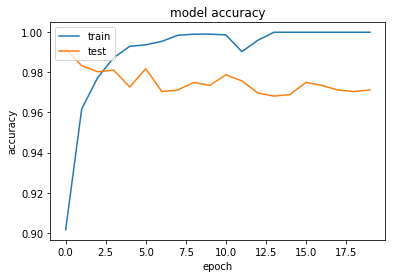

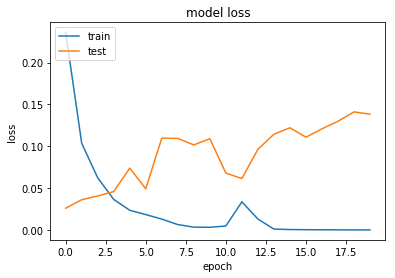

In [7]:
import matplotlib.pyplot as plt
# Model Accuracy Visualisation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss Visualisation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()